# Dimensionality Reduction

$\textbf{Introdution.}$ We have seen that the second step of statistics may be data description. It may be intricately linked to data cleaning: for instance, you realize your data needs cleaning when describing it through a histogram and ending up with absurd values.

On the other hand, dimensionality reduction may serve different purposes:
    
- $\textbf{Visualization:}$ if your initial data lies in a high dimensional space, you may want to visualize it
in $\mathbb{R}^2$ or $\mathbb{R}^3$ or to detect possible patterns or anomalies;

- $\textbf{Providing a suitable input:}$ if your database is so large that you cannot practically compute
estimates with it all, dimensionality reduction is mandatory;

- $\textbf{Avoiding the curse of dimensionality:}$ this expression refers to range of issues encountered
when dealing with data in high-dimensional spaces. Indeed, it becomes more difficult to
detect patterns overall, as data density decreases and computational complexity increases.
Therefore dimensionality reduction techniques also help providing better suited inputs for
models.

$\textbf{Dataset.}$ In this session, we are first focusing on a standard dataset in machine learning: the MNIST dataset of handwritten digits. It contains 70,000 black and white $28\times 28$ pixel images representing handwritten digits from 0 to 9. We are going to answer the following questions:
- How to visualize MNIST images in $\mathbb{R}^2$ in a pertinent way (ie in way that a reflects intrinsic similarities) ?
- How to assess whether dimensionality reduction has yielded qualitatively suitable outputs ?

### Loading useful packages and the MNIST dataset.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load training and eval data
((X, Y),
 (eval_data, eval_labels))=tf.keras.datasets.mnist.load_data()

X=X/np.float32(255)
Y=Y.astype(np.int32)  # not required

eval_data=eval_data/np.float32(255)
eval_labels=eval_labels.astype(np.int32)  # not required

print('Training data contains '+str(X.shape[0])+' examples of size '+str(X.shape[1])+'*'+str(X.shape[2]))
print('Test data contains '+str(eval_data.shape[0])+' examples of size '+str(eval_data.shape[1])+'*'+str(eval_data.shape[2]))

11493376/11490434 [==============================] - 0s 0us/step
Training data contains 60000 examples of size 28*28
Test data contains 10000 examples of size 28*28


### 1) Visualizing data examples: show how data look like, choose one example and show it

Image has label 8


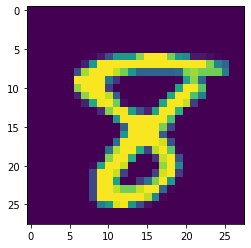

In [ ]:
# Visualize examples
idx=np.random.randint(0,X.shape[0])
print('Image has label '+str(Y[idx]))
plt.figure()
plt.imshow(X[idx])
plt.show()

We turn the database into a dataframe, which is a convenient format to manipulate large amounts of data. Each column corresponds to a pixel value, the last column being the image label (within $\{0,..,9\}$).

In [ ]:
print(X.shape)
X_new=np.reshape( X,(-1,28*28) )
print(X_new.shape)

(60000, 28, 28)
(60000, 784)


### 2) Turn data into dataframe

In [ ]:
# Turn data into dataframe
X=np.reshape( X,(X.shape[0],-1) )
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X, columns=feat_cols)

df['label'] = Y
df['label'] = df['label'].apply(lambda i: str(i))

print( 'Size of the dataframe is {}'.format(df.shape) )
df.head()

Size of the dataframe is (60000, 785)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.164706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


### 3) Using this format, we can visualize a subsample of the digits.

<Figure size 432x288 with 0 Axes>

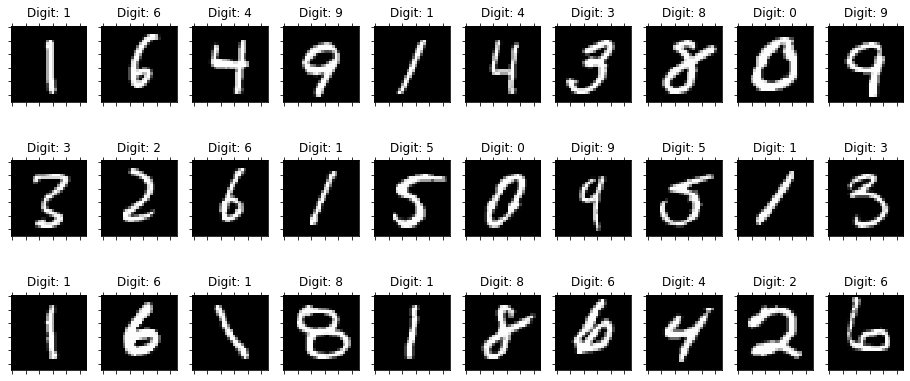

In [ ]:
# Permutation for random subsampling
rndperm = np.random.permutation(df.shape[0])
# Plot some chosen examples
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + df.loc[rndperm[i],'label'])
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

### Dimensionality Reduction through Principal Component Analysis (PCA).

The aim of PCA is to turn a set of possibly correlated variables into linearly uncorrelated variables (called “principal components”) through an orthogonal transformation. The idea is that:
- the first component ($C_1$) accounts for most of the variance in the data;
- the second ($C_2$) accounts for the second highest variance, and is orthogonal to $C_1$;
- etc.
The orthogonality condition makes the data way easier to visualize, while the variance criterion ranks components by order of relative importance.

In order to achieve that, the optimization procedure aims at finding a matrix of weights $W$ mapping each $x_i \in \mathbb{R}^d$ to a principal components score $t_{k,i}=\langle x_i, w_k\rangle$ inheriting the most variance from $X$, ie the first weight vector $w_1$ solves: $$\max_{\lvert\lvert w\rvert \rvert} \sum_i (t_{1,i})^2.$$ Other weights are retrieved by the same operation on $X$ minus its first components.

This process yields a decomposition of the form $T=XW$. Using this: 
- dimensionality reduction can be performed in this context by only selecting the first $L$ components: $T_L=X W_L$;
- a first idea for visualization in $\mathbb{R}^2$ is to only represent the first two components.

Let us try this out on the MNIST dataset.

### 4) Perform PCA
Create 2-d scatter plot with first and second dimensions of PCA, draw different dots with different colors. Use `seaborn` library for this.

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print( 'Explained variance ratio per principal component: {}'.format(pca.explained_variance_ratio_) )

Explained variance ratio per principal component: [0.09704716 0.07095952 0.06169127]


In [ ]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.485968,-1.226113,-0.096307
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.967475,-1.156278,2.338741
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.203380,1.537934,-0.739421
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.133878,-2.381193,1.073100
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,-1.501046,2.864882,0.064252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,-0.390721,-1.150896,0.532917
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.599004,-2.697624,-0.348721
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,-0.698293,0.627775,-1.010505
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
df["label"].unique()

array(['5', '0', '4', '1', '9', '2', '3', '6', '7', '8'], dtype=object)

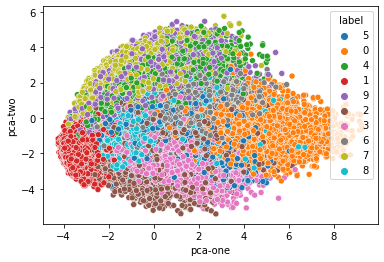

In [ ]:
import seaborn as sns
import matplotlib.cm as cm
#sns.pairplot(vars=["pca-one", "pca-two"], data=df, hue= "label", height=6)
#sns.pairplot(x_vars="pca-one",  y_vars = "pca-two", data=df, hue= "label", height=6)

#df['label'] = df['label'].apply(lambda i: int(i))
#x = np.arange(10)
#ys = [i+x+(i*x)**2 for i in range(10)]
#colormap = cm.rainbow(np.linspace(0, 1, len(ys)))
#plt.scatter(df["pca-one"], df["pca-two"], c=colormap[df["label"]])

df['label'] = df['label'].apply(lambda i: str(i))
sns.scatterplot( x="pca-one", y="pca-two",  hue="label", data=df)


### 5) Make inference about this method

It seems that 0s and 1s are well separated from other classes. However, for the other labels, let us try to do better.

### Dimensionality Reduction through t-distributed stochastic neighbor embedding (t-SNE)

On the other hand, we study t-SNE, which is a nonlinear dimensionality reduction method particularly suited for the visualization of high-dimensional data.

The idea is reduce dimensionality by minimizing the distance between pairwise probabilities in the high-dimensional space and in a lower-dimensional space. It consists of two steps:
- constructing a probability on the high dimensional object pairs: similar pairs have a high probability of being chosen, unlike dissimilar observations;
- creating a similar probability distribution in a low dimensional space, minimizing some distance between the two.

Let us try it: is it possible to apply it on all the data? Does that improve the visual performance?

### 6) Use t-SNE model to do dimensionality reduction

In [ ]:
# T-sne
# n_sne = 60000 # data subsampling
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start) )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.656s...
[t-SNE] Computed neighbors for 7000 samples in 82.991s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.226951
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.385239
[t-SNE] KL divergence after 300 iterations: 2.456498
t-SNE done! Time elapsed: 105.16869044303894 seconds


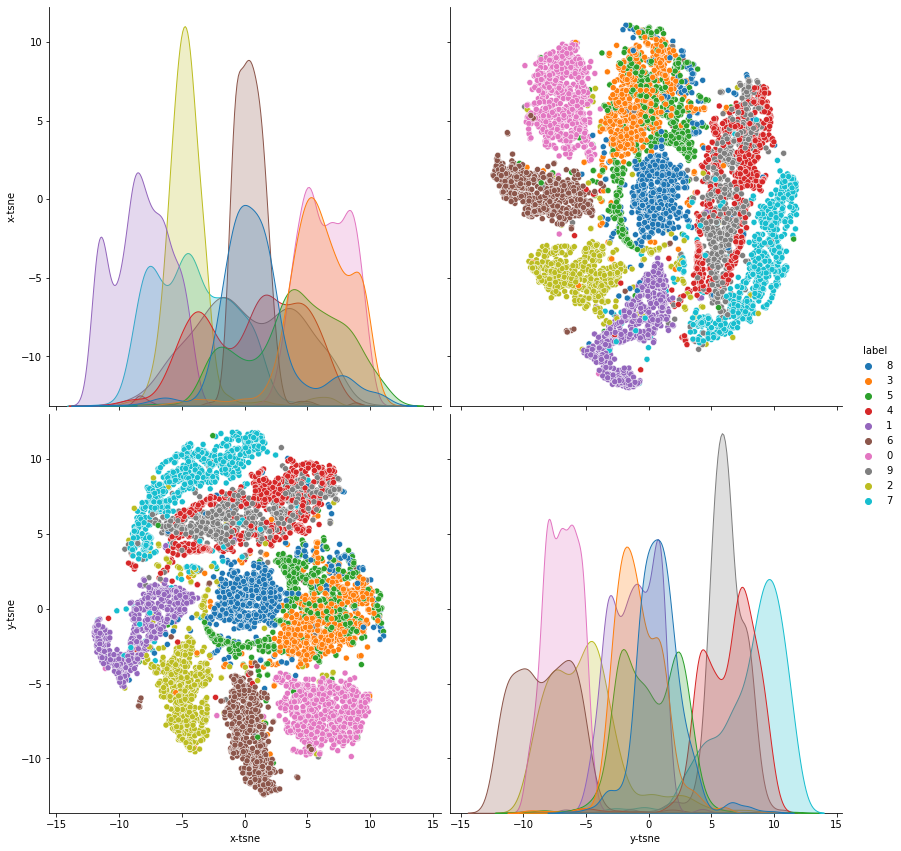

In [ ]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

import seaborn as sns
#sns.pairplot(x_vars=["x-tsne"], y_vars=["y-tsne"], data=df_tsne, hue="label", height=6)
sns.pairplot(vars=["x-tsne", "y-tsne"], data=df_tsne, hue="label", height=6)


In [ ]:
df_tsne

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three,x-tsne,y-tsne
18559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,-0.995090,-0.734433,-2.139536,1.875142,0.987396
38241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.729279,-2.643936,-2.957470,6.422708,-2.012349
32488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3.061348,-1.618826,-3.875142,10.507400,0.193315
39990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1.051997,3.294595,0.015332,1.030467,8.059349
37433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.833730,-2.104091,0.770317,-11.760080,-1.331992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,-1.666536,-1.213773,0.215084,-5.491599,-3.736995
26591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,-0.142951,1.815303,-2.211743,0.062654,11.422217
5961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.462438,-0.493559,2.745314,6.156313,-8.705856
2980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### 7) Make inference about this method

On a subsample, we seem to have gained performance. However some classes are still quite difficult to differenciate. Let us see if we can do even better...

### Combination of the two.

Since PCA handles large inputs better, a solution would be to combine the two, and perform t-SNE on PCA outputs. How does that improve performance ? How far can we go in terms of components ?

### 8) use 50 dimentions with PCA model

In [ ]:
# T-sne on larger PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print( 'Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)) )

Cumulative explained variation for 50 principal components: 0.8245947360992432


In [ ]:
n_sne = 28000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])


print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start) )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 28000 samples in 0.221s...
[t-SNE] Computed neighbors for 28000 samples in 128.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28000
[t-SNE] Computed conditional probabilities for sample 2000 / 28000
[t-SNE] Computed conditional probabilities for sample 3000 / 28000
[t-SNE] Computed conditional probabilities for sample 4000 / 28000
[t-SNE] Computed conditional probabilities for sample 5000 / 28000
[t-SNE] Computed conditional probabilities for sample 6000 / 28000
[t-SNE] Computed conditional probabilities for sample 7000 / 28000
[t-SNE] Computed conditional probabilities for sample 8000 / 28000
[t-SNE] Computed conditional probabilities for sample 9000 / 28000
[t-SNE] Computed conditional probabilities for sample 10000 / 28000
[t-SNE] Computed conditional probabilities for sample 11000 / 28000
[t-SNE] Computed conditional probabilities for sample 12000 / 28000
[t-SNE] Computed conditional probabilities for 

In [ ]:
# 27 seconds for 7000
# 64 seconds for 14000
# 251   seconds for 28000

### 9) Implement the tSNE model and visualise results and make inference

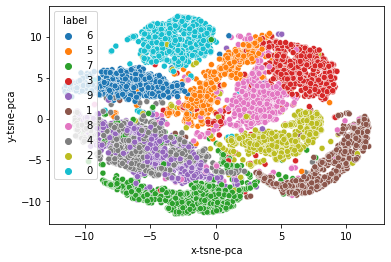

In [ ]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

#sns.pairplot(x_vars=["x-tsne-pca"], y_vars=["y-tsne-pca"], data=df_tsne, hue="label", height=6)
#sns.pairplot(vars=["x-tsne-pca","y-tsne-pca"], data=df_tsne, hue="label", height=6)
sns.scatterplot( x="x-tsne-pca", y="y-tsne-pca",  hue="label", data=df_tsne)